In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

In [13]:
df = pd.read_csv('Energy_consumption.csv')

In [15]:
display(df.head())


,Unnamed: 0,TxnDate,TxnTime,Consumption
0,76229,01 Jan 2022,16:55:52,1.010
1,76258,01 Jan 2022,21:45:29,0.908
2,76287,01 Jan 2022,12:24:52,0.926
3,76316,01 Jan 2022,04:07:36,0.928
4,76345,01 Jan 2022,06:52:25,0.916


In [17]:
print(df.dtypes)

Unnamed: 0       int64
TxnDate         object
TxnTime         object
Consumption    float64
dtype: object


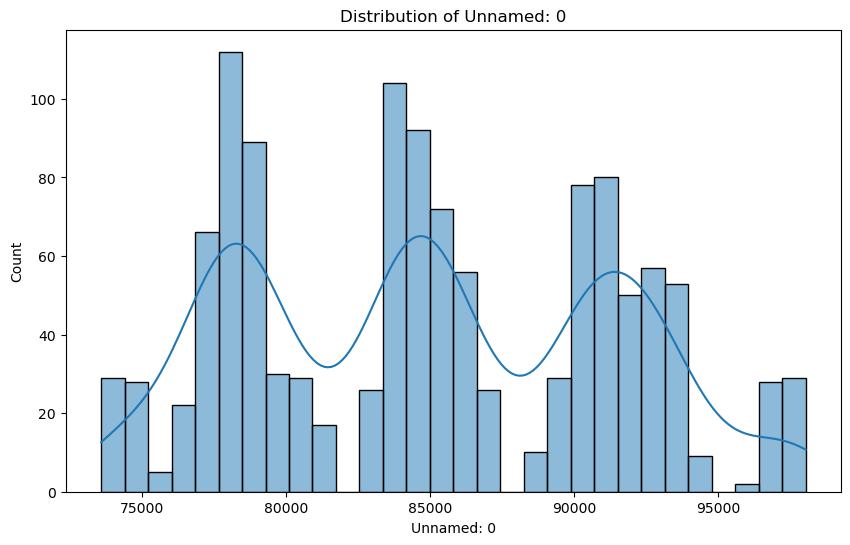

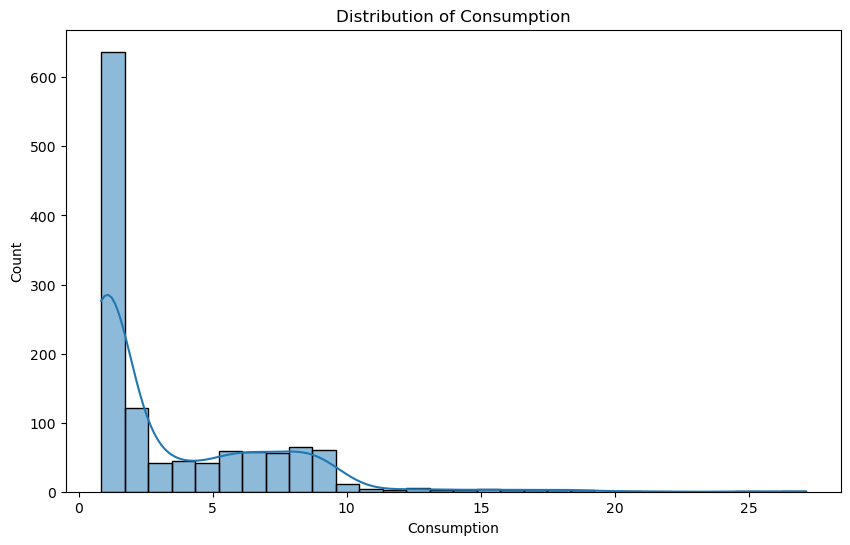

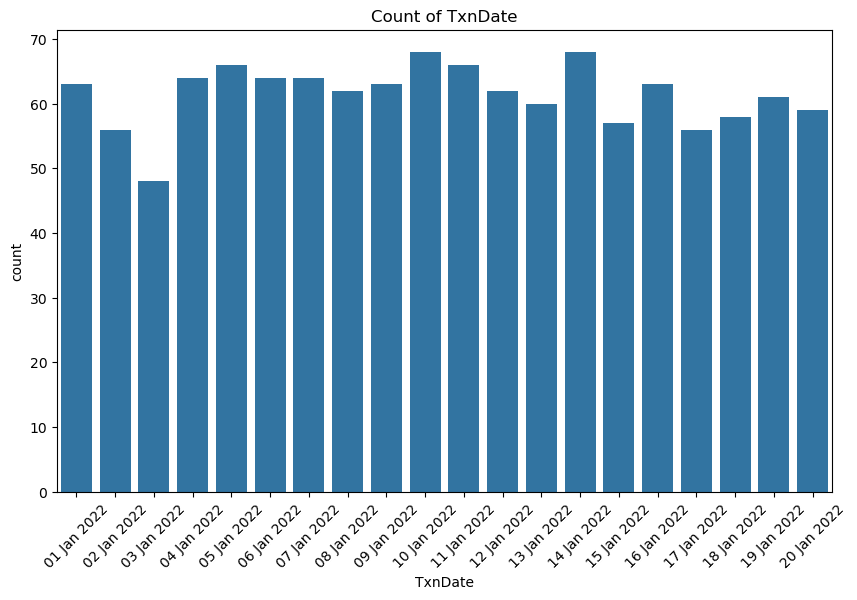

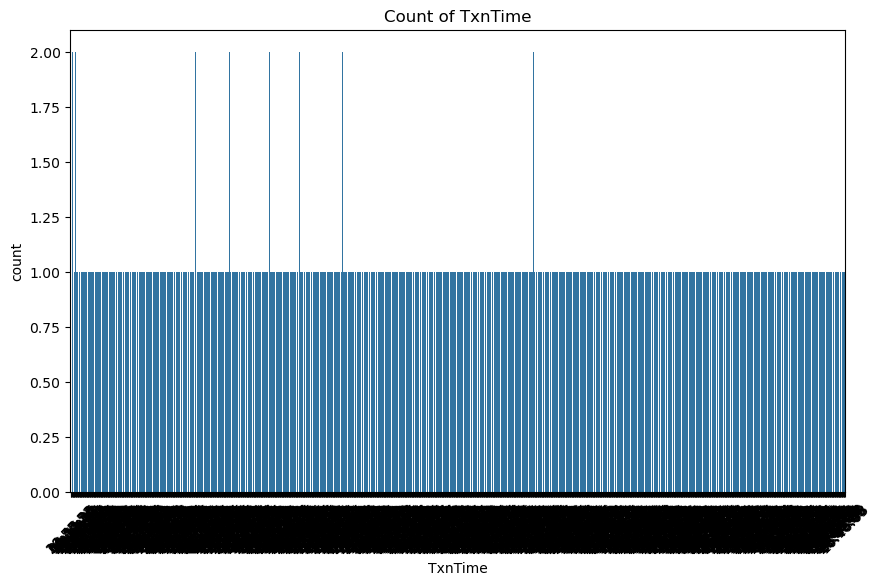

In [19]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot count of categorical columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [31]:
# Convert columns to numeric, setting errors to 'coerce' to turn invalid strings into NaN
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')


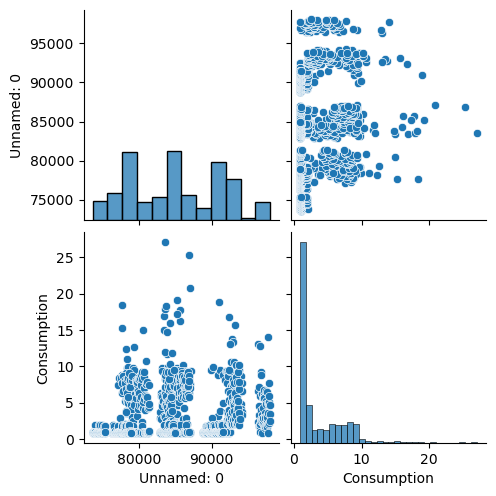

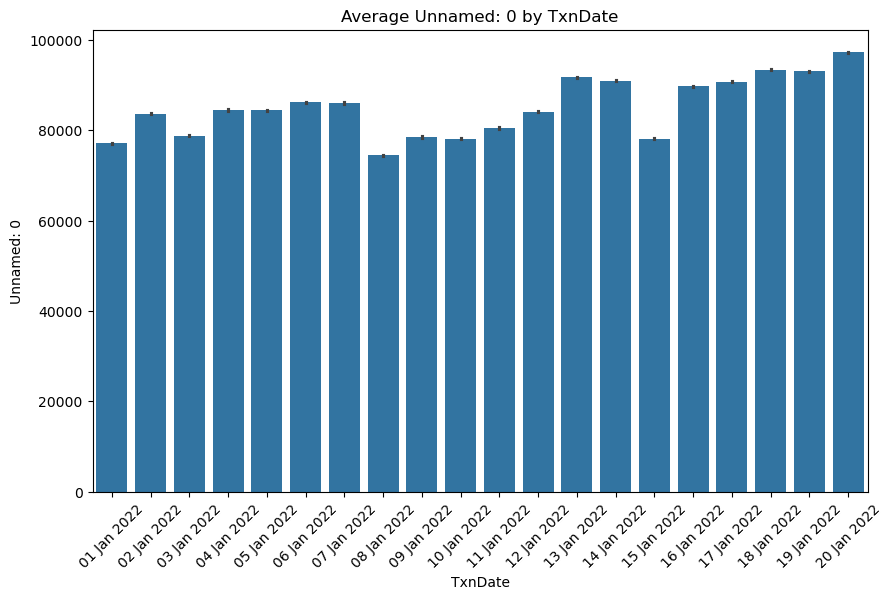

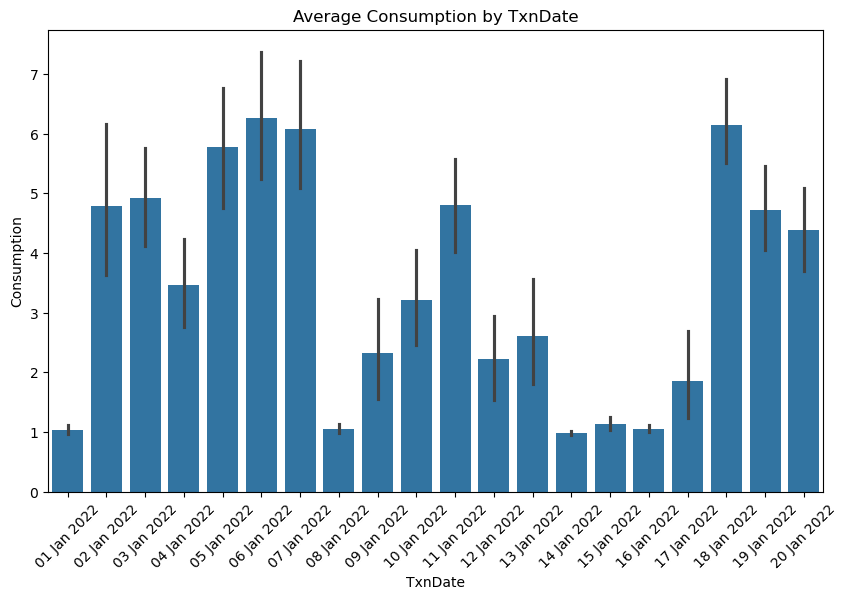

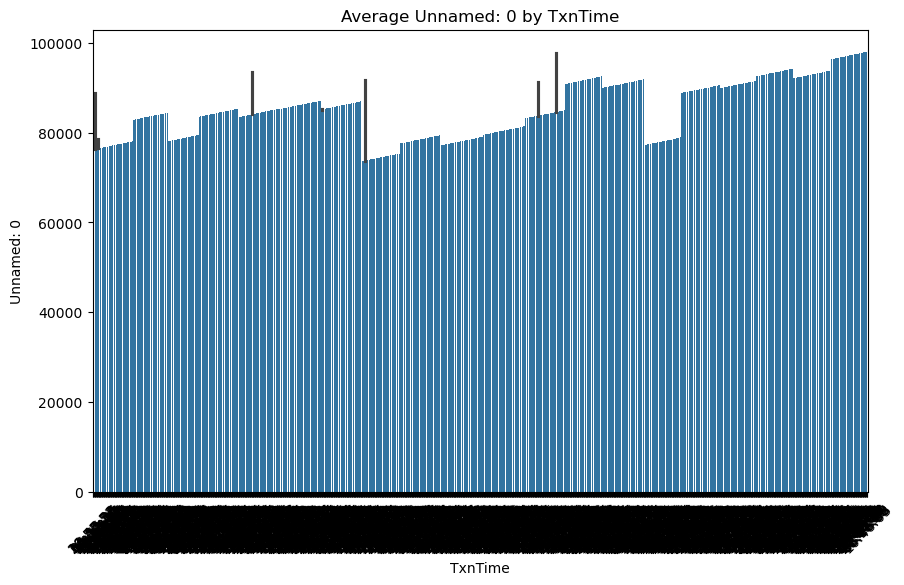

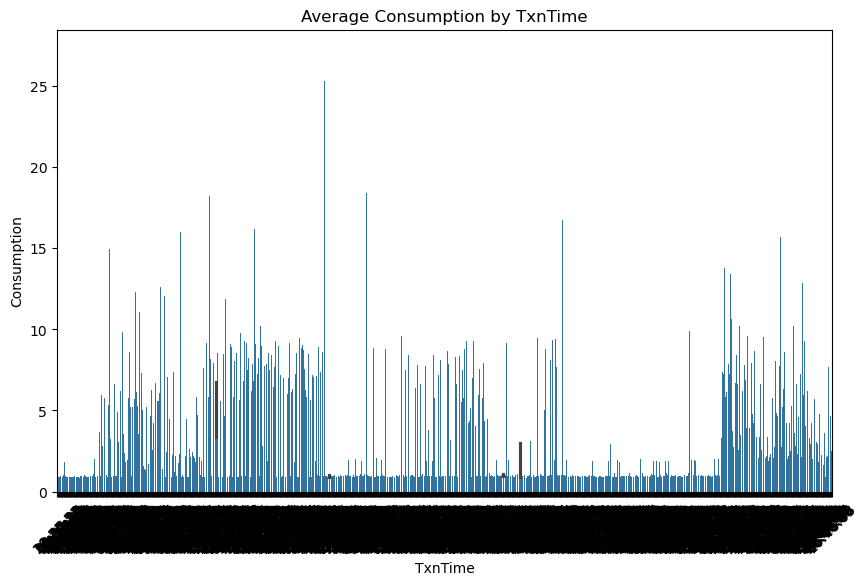

In [35]:
sns.pairplot(df[numerical_cols])
plt.show()

# Grouped analysis (e.g., average numerical value by category)
for col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=col, y=num_col, data=df)
        plt.title(f'Average {num_col} by {col}')
        plt.xticks(rotation=45)
        plt.show()


In [37]:
if 'target_column' in df.columns:  # Replace with actual target column
    fig = px.scatter(df, x='feature_1', y='feature_2', color='target_column')  # Replace with your columns
    fig.show()

# Interactive correlation heatmap
fig = px.imshow(correlation_matrix, text_auto=True)
fig.show()

# Interactive bar plot
fig = px.bar(df, x='categorical_column', y='numerical_column', color='categorical_column')  # Replace with actual columns
fig.show()

NameError: name 'correlation_matrix' is not defined